In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings;warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


**Attribute Information**
1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

#### Data Preparation

Summary
* filled "bmi" col null value with its median value
* Label and One hot encoded "gender", "ever_married", "Residence_type", "work_type", and "smoking_status" column
* dropped "id" col and dropped other category from "gender" col
* dropped outliers from "bmi" and "avg_glucose_level"
* transformed "bmi" and "avg_glucose_level" to make it normally distributed


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


> * BMI column have ~ 4% null values, we can fix this by dropping or imputing it with other values like mean

In [4]:
df_new = df.copy()
df_new['bmi'] = df_new.bmi.fillna(df.bmi.median())

In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,5110.0,NaN,NaN,NaN,36517.829354,21161.721625,67.0,17741.25,36932.0,54682.0,72940.0
gender,5110,3,Female,2994,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,5110.0,NaN,NaN,NaN,43.226614,22.612647,0.08,25.0,45.0,61.0,82.0
hypertension,5110.0,NaN,NaN,NaN,0.097456,0.296607,0.0,0.0,0.0,0.0,1.0
heart_disease,5110.0,NaN,NaN,NaN,0.054012,0.226063,0.0,0.0,0.0,0.0,1.0
ever_married,5110,2,Yes,3353,NaN,NaN,NaN,NaN,NaN,NaN,NaN
work_type,5110,5,Private,2925,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Residence_type,5110,2,Urban,2596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_glucose_level,5110.0,NaN,NaN,NaN,106.147677,45.28356,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,NaN,NaN,NaN,28.893237,7.854067,10.3,23.5,28.1,33.1,97.6


In [6]:
df.sort_values(by='age').head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3295,29955,Male,0.08,0,0,No,children,Rural,70.33,16.9,Unknown,0
1614,47350,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0
3618,22877,Male,0.16,0,0,No,children,Urban,114.71,17.4,Unknown,0
4021,8247,Male,0.16,0,0,No,children,Urban,109.52,13.9,Unknown,0
3968,41500,Male,0.16,0,0,No,children,Rural,69.79,13.0,Unknown,0


> * Age has min value of 0.08 year (which converts to 29.22 days), so dataset has newly born babies too

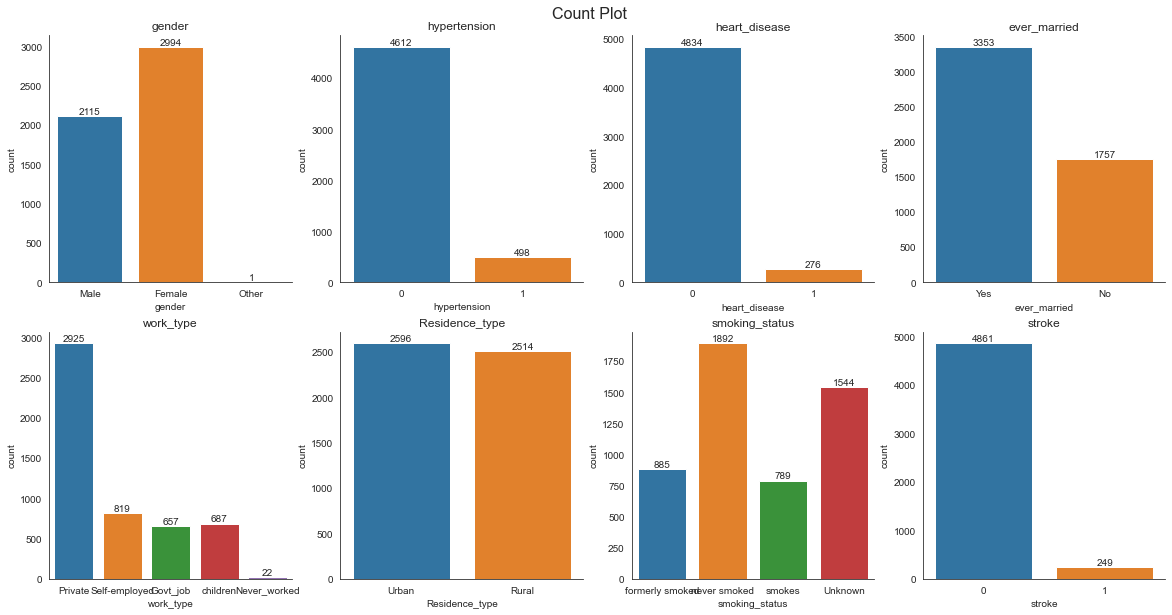

In [7]:
# columns countplot
sns.set_style('white')
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Count Plot', fontsize=16, y=0.92)

columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 
          'work_type', 'Residence_type', 'smoking_status', 'stroke']
i = 0
for x in range(2):
    for y in range(4):
        graph = sns.countplot(x=df[columns[i]], ax=ax[x][y])
        ax[x][y].set_title(*[columns[i]])
        graph.bar_label(graph.containers[0])
        i += 1

sns.despine()
plt.show()

> * We only have one person in other gender category. We can remove that, as one records for that category won't help our model learn better about the relation.
> * class is highly imbalanced, we can apply SMOTE to solve this
> * we can also label encode these categorical columns

In [8]:
df_new['gender'] = df_new['gender'].apply(lambda x: 1 if x=="Male" else 0)
df_new['ever_married'] = df_new['ever_married'].apply(lambda x: 1 if x=="Yes" else 0)
df_new['Residence_type'] = df_new['Residence_type'].apply(lambda x: 1 if x=="Urban" else 0)
df_new = pd.get_dummies(df_new, columns=['work_type', 'smoking_status'])
df_new.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1,67.0,0,1,0,0,228.69,36.6,1,0,0,1,0,0,0,1,0,0
1,51676,0,61.0,0,0,0,0,202.21,28.1,1,0,0,0,1,0,0,0,1,0
2,31112,1,80.0,0,1,0,0,105.92,32.5,1,0,0,1,0,0,0,0,1,0
3,60182,0,49.0,0,0,0,0,171.23,34.4,1,0,0,1,0,0,0,0,0,1
4,1665,0,79.0,1,0,0,0,174.12,24.0,1,0,0,0,1,0,0,0,1,0


In [9]:
# is id column adding any value
print("total unique id", len(df.id.unique()))
print("total records", len(df))

total unique id 5110
total records 5110


> * we can drop the id column as it is not adding any information

In [10]:
df_new.drop('id', axis=1, inplace=True)
df_new.drop(df_new[df_new.gender == 'Other'].index, inplace=True)

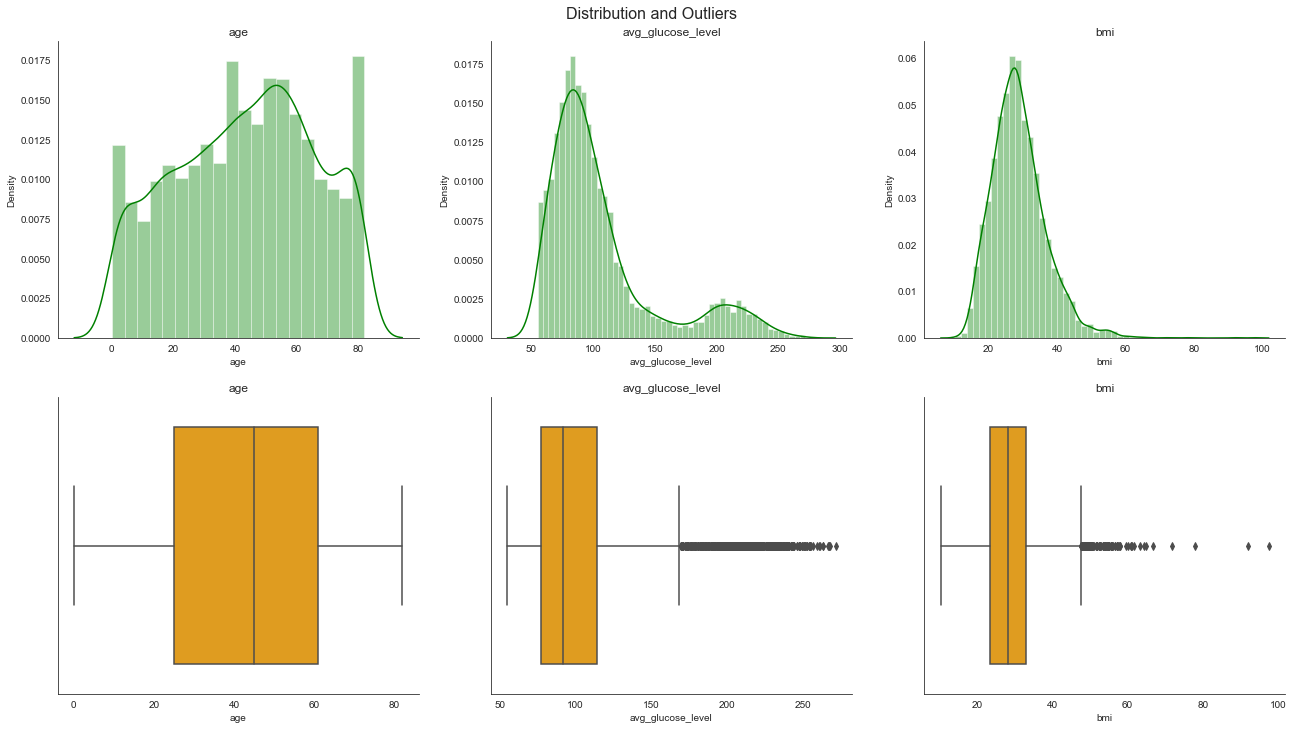

In [14]:
# distribution of numerical columns
sns.set_style('white')
fig, ax = plt.subplots(2, 3, figsize=(22, 12))
fig.suptitle('Distribution and Outliers', fontsize=16, y=0.92)

columns = ['age', 'avg_glucose_level', 'bmi']
for x in range(2):
    for i, col in enumerate(columns):
        if x == 0:
            sns.distplot(df[col], color='green', ax=ax[x][i])
        else:
            sns.boxplot(df[col], color='orange', ax=ax[x][i])
        ax[x][i].set_title(col)

sns.despine()
plt.show()

> * col "avg_glucose_level" isn't normally distributed and it also has lots of outlier.
> * col "bmi" seems to right skewed, and it also has lots of outliers.

In [15]:
# outlier detection function
def outlier(col:str, df_:pd.DataFrame=df, remove:bool=False) -> list:
    """This function calculates the upper and lower fence
    of any column and can also remove from the dataset"""
    q1 = df_[col].quantile(0.25)
    q3 = df_[col].quantile(0.75)
    
    iqr = q3-q1
    lower_fence = q1 - iqr*1.5
    upper_fence = q3 + iqr*1.5

    if remove:
        temp = df_[(df_[col] > lower_fence) & (df_[col] < upper_fence)]
        return temp

    return [lower_fence, upper_fence]

In [16]:
print("Outliers in 'bmi' column", len(df[(df['bmi'] < outlier('bmi')[0]) | (df['bmi'] > outlier('bmi')[1])]))
print("Outliers in 'avg_glucose_level' column", len(df[(df['avg_glucose_level'] < outlier('avg_glucose_level')[0]) | (df['avg_glucose_level'] > outlier('avg_glucose_level')[1])]))

Outliers in 'bmi' column 110
Outliers in 'avg_glucose_level' column 627


In [17]:
# dropping outliers
df_new = outlier('bmi', df_=df_new, remove=True)
df_new = outlier('avg_glucose_level', df_=df_new, remove=True)

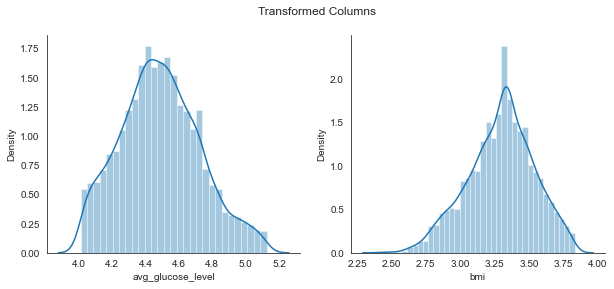

In [18]:
# transformation
df_new['bmi'] = np.log(df_new['bmi'])
df_new['avg_glucose_level'] = np.log(df_new['avg_glucose_level'])

# viz
sns.set_style('white')
fig, ax = plt.subplots(1,2, figsize=(10, 4))
fig.suptitle('Transformed Columns')
sns.distplot(df_new['avg_glucose_level'], ax=ax[0])
sns.distplot(df_new['bmi'], ax=ax[1])
sns.despine()
plt.show()

#### Data Exploration

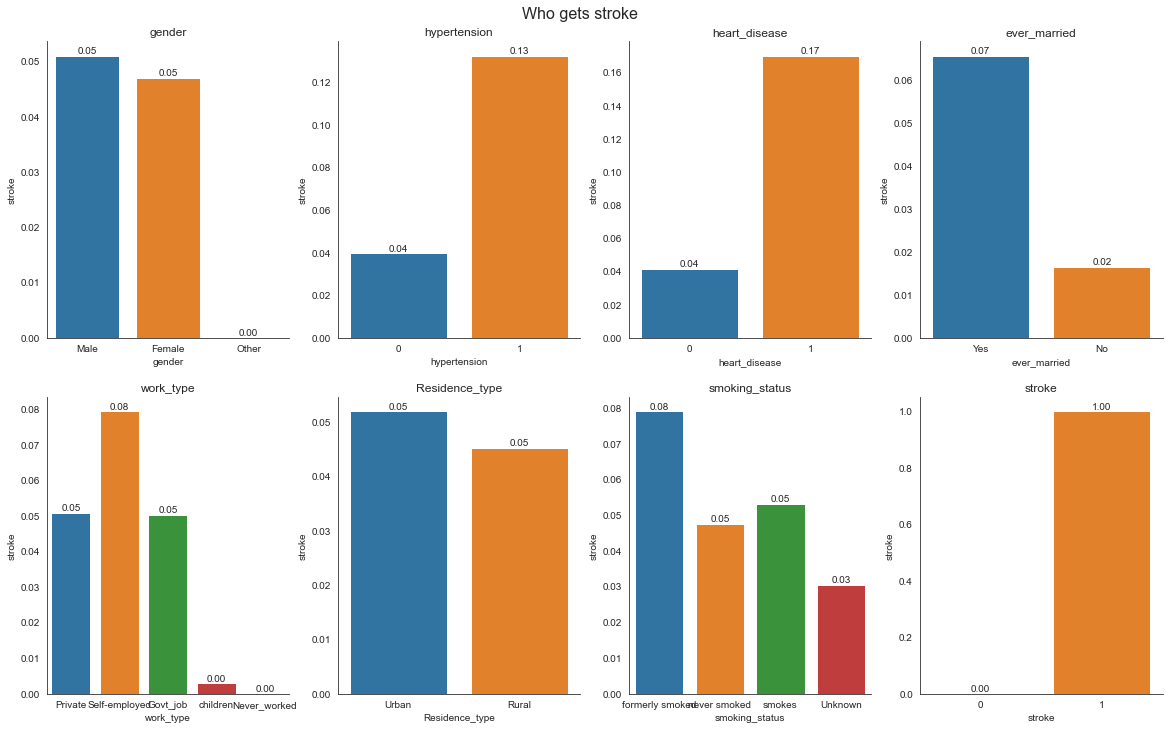

In [19]:
# stroke
sns.set_style('white')
fig, ax = plt.subplots(2, 4, figsize=(20, 12))
fig.suptitle('Who gets stroke   ', fontsize=16, y=0.92)

columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 
          'work_type', 'Residence_type', 'smoking_status', 'stroke']
i = 0
for x in range(2):
    for y in range(4):
        graph = sns.barplot(df[columns[i]], df['stroke'], ci=None, ax=ax[x][y])
        ax[x][y].set_title(*[columns[i]])
        graph.bar_label(graph.containers[0], fmt='%.2f')
        # ax[x][y].legend().set_visible(False)
        i += 1


sns.despine()
plt.show()

From the graph we can see
> * hypertension causes more stroke
> * heart diseases is also a good factor of stroke
> * married peoples are getting more stroke than others
> * self-employed peoples are also more likely to get stroke
> * people living in urban area tend to get more stroke
> * and, formely smoker are no doubt a high stroke patient

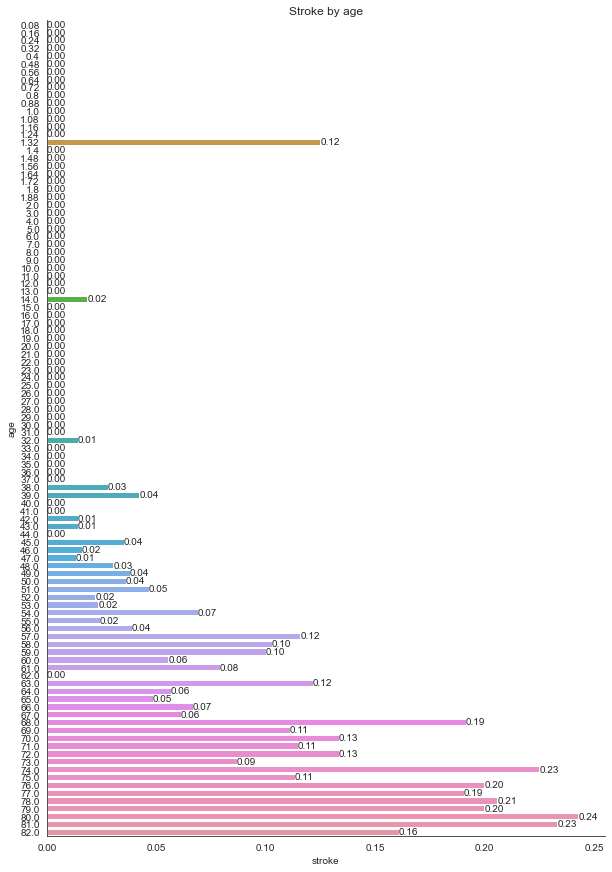

In [20]:
# stroke by age
sns.set_style('white')
plt.figure(figsize=(10, 15))
graph = sns.barplot(df['stroke'], df['age'], orient='h', ci=None)
graph.bar_label(graph.containers[0], fmt='%.2f')
plt.title('Stroke by age')
sns.despine()
plt.show()

> * it looks like people above 74 tends to get higher stroke
> * surprisingly child of age 1.3 years are also very prone to stroke

#### Feature selection

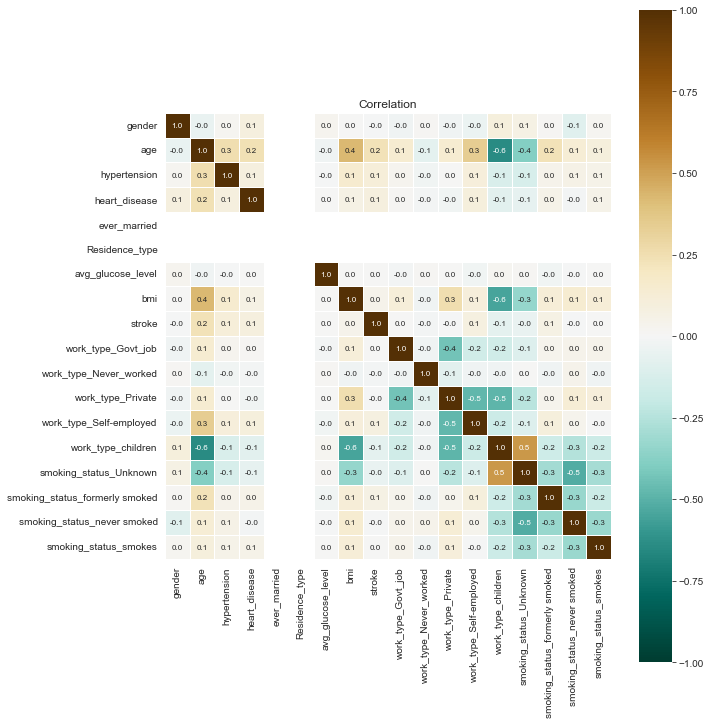

In [24]:
# correlation
plt.figure(figsize=(10,12))
sns.heatmap(df_new.corr(), vmax=1, vmin=-1, center=0,
			linewidth=.5,square=True, annot = True,
            annot_kws = {'size':8},fmt='.1f', cmap='BrBG_r') # cbar_kws: for positioning cbar and "shrink" for reducing cbar size
plt.title('Correlation')
plt.show()


> * There isn't any strong correleation between any column

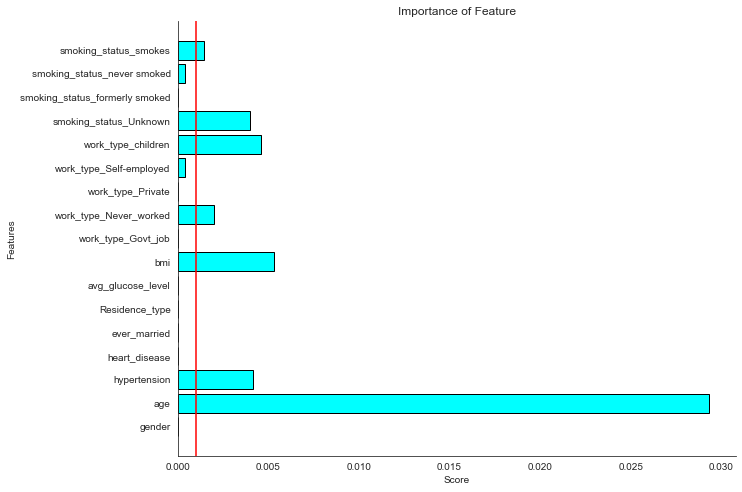

In [40]:
# finding relevat column by information gain
from sklearn.feature_selection import mutual_info_classif

# score of the dataset
score = mutual_info_classif(df_new.drop('stroke', axis=1), df_new['stroke'])

# lets plot it
plt.figure(figsize=(10, 8))
plt.barh(df_new.drop('stroke', axis=1).columns, score, color = 'cyan', edgecolor='black')
plt.axvline(0.001, color='red')
plt.title('Importance of Feature')
plt.xlabel('Score')
plt.ylabel('Features')
sns.despine()
plt.show()

> * Based on information-gain following are the features which aren't adding much values;
> * ['gender', 'heart_disease', 'ever_married', 'Residence_type', '']

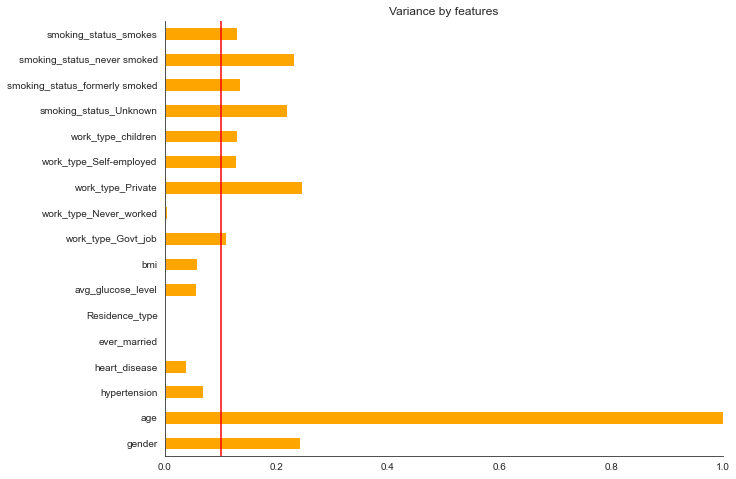

In [39]:
sns.set_style('white')
plt.figure(figsize=(10, 8))
df_new.drop('stroke', axis=1).var().plot(kind='barh', color='orange')
plt.axvline(0.1, color='red')
plt.title('Variance by features')
plt.xlim(0, 1)
sns.despine()
plt.show()